<img src="img/logoifsc.png">
<link rel="stylesheet" href="baseado_em_instancias.css">

---

Prof. Carlos Andrés Ferrero

# Mineração de Dados

## Aprendizado Supervisionado Baseado em Instâncias
    
---

## Conteúdo
- Introdução
- Principal Algoritmo: kNN
- Parâmetros: k, medida de distância e função de predição
- Exercícios

## Introduçao

- O Aprendizado Baseado em Instâncias/Exemplos (Instance Based Learning ou também Lazy Learning) é um tipo de aprendizado que foca em experiências anteriores.

- Para exemplificar, vamos imaginar um consultório médico em que o especialista consegue salvar todas as entrevistas (anamneses) feitas a pacientes juntamente com o seu diagnóstico.

- Esses dados são anotados em fichas e guardados em um ficheiro. Vamos supor que ao longo do anos adquirimos muita experiência armazenando fichas de pacientes.

- Ao chegar um novo paciente no consultório, o especialista faz uma entrevista ao paciênte e procura no ficheiro qual é o paciente que apresentou, no passado, o resultado da entrevista mais similar. Uma vez achado o mais similar atribui-se o diagnóstico dele, a este novo paciente.

#### Exemplo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')[['sepal_length','sepal_width','species']]
df.head()

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


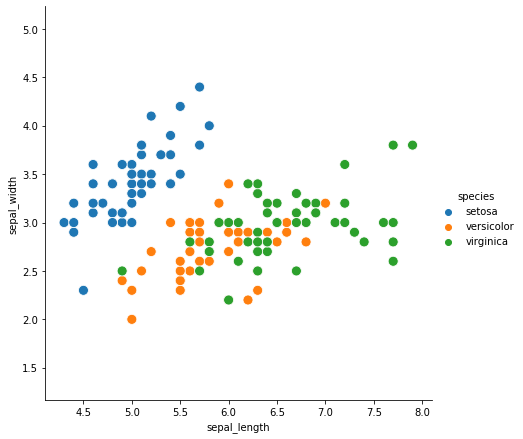

In [8]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=6, s=100)
plt.axis('equal')
plt.show()

- Qual é a classe do exemplo representada pelo X em vermelho? (1)

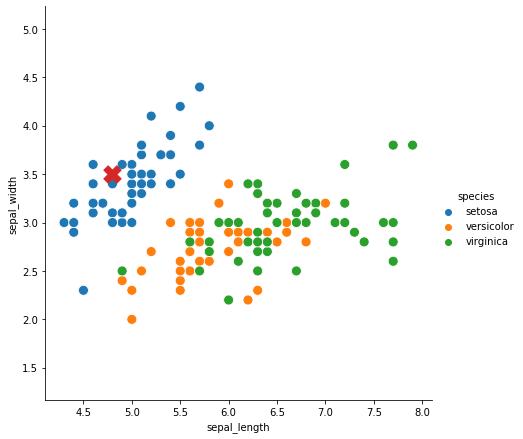

In [9]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=6, s=100)
plt.scatter(x = 4.8, y = 3.5, marker='X', color=sns.color_palette()[3], s=300)
plt.axis('equal')
plt.show()

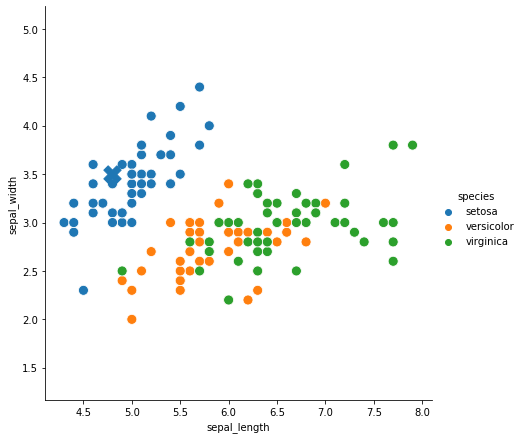

In [11]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=6, s=100)
plt.scatter(x = 4.8, y = 3.5, marker='X', color=sns.color_palette()[0], s=300)
plt.axis('equal')
plt.show()

- Qual é a classe do exemplo representada pelo ponto preto? (2)

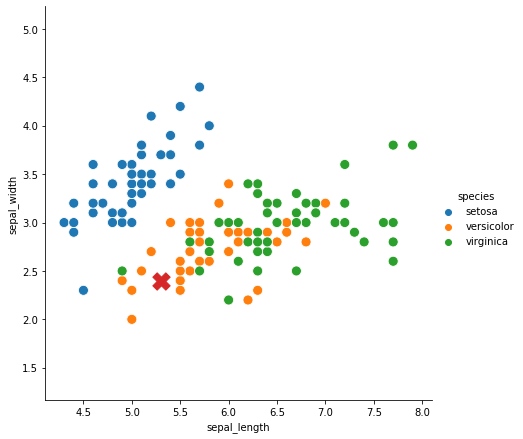

In [12]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=6, s=100)
plt.scatter(x = 5.3, y = 2.4, marker='X', color=sns.color_palette()[3], s=300)
plt.axis('equal')
plt.show()

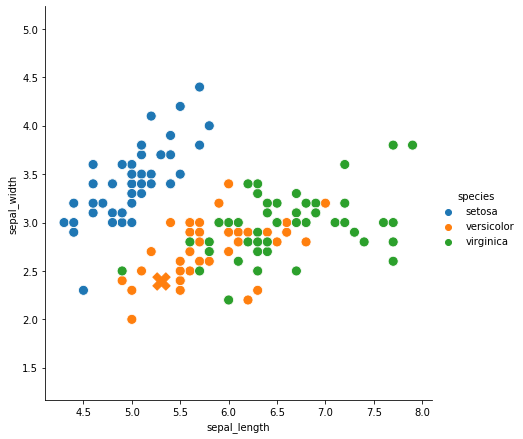

In [13]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=6, s=100)
plt.scatter(x = 5.3, y = 2.4, marker='X', color=sns.color_palette()[1], s=300)
plt.axis('equal')
plt.show()

- Qual é a classe do exemplo representada pelo ponto preto? (3)

(4.10405376910912, 8.095946230890881, 1.864463276836158, 4.535536723163842)

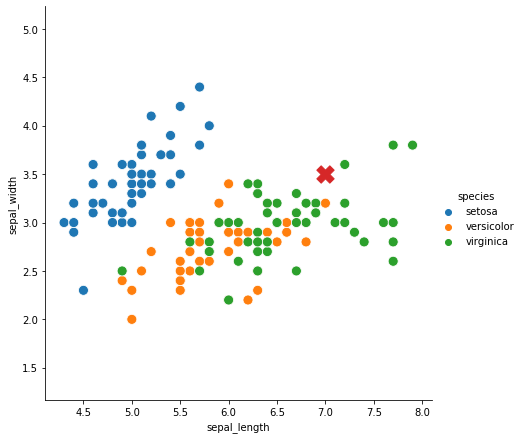

In [14]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=6, s=100)
plt.scatter(x = 7, y = 3.5, marker='X', color=sns.color_palette()[3], s=300)
plt.axis('equal')

(4.10405376910912, 8.095946230890881, 1.864463276836158, 4.535536723163842)

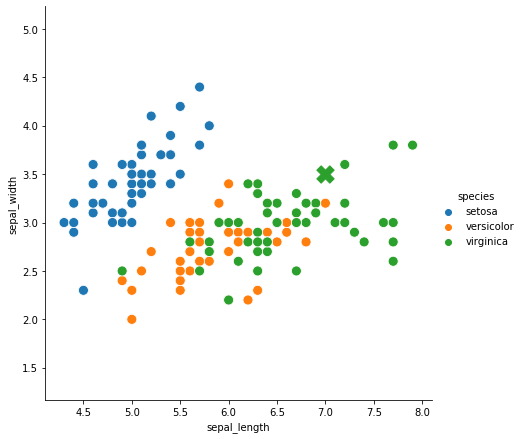

In [15]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=6, s=100)
plt.scatter(x = 7, y = 3.5, marker='X', color=sns.color_palette()[2], s=300)
plt.axis('equal')

- Em todos os casos anteriores foi simples de atrbiuir a classe ao novo exemplo baseado no elemento mais próximo, mas nem sempre temos essa sorte.

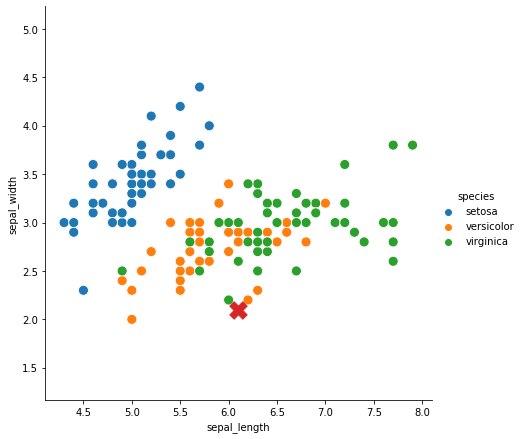

In [17]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=6, s=100)
plt.scatter(x = 6.1, y = 2.1, marker='X', color=sns.color_palette()[3], s=300)
plt.axis('equal')
plt.show()

# Principal Algoritmo

- O Instance Based Learning (IBL) tem como seu principal algoritmo o k-Nearest Neighbors (kNN) ou k-Vizinhos Mais Próximos.

- Esse algoritmo consiste em **classificar um novo exemplo do problema baseado na classe do(s) exemplo(s) mais similares no conjunto de treinamento**.

- Esse algoritmo possui os seguintes parâmetros, como:
    - O **valor $k$** do número de exemplos mais similares do conjunto de treinamento que serão utilizados.
    - Uma **função de distância** ou similaridade, de forma a determinar numericamente a distância entre duas instâncias/exemplos.
    - Uma **função de predição** que decida, dentre as classes das $k$ instâncias mais próximas, qual será a classe de novo exemplo.
    - *Quais exemplos* do conjunto de treinmento serão usados para procurar os mais similares (todos? os melhores?).    

### Exemplo de Execução do Algoritmo kNN

- **valor k**: 1
- **função de distância**: distância euclidiana
- **função de predição**: a classe do exemplo mais próximo
- Serão usados todos os exemplos disponíveis no conjunto de treinamento

- Qual é a classe do exemplo representada pelo X em vermelho? (1)

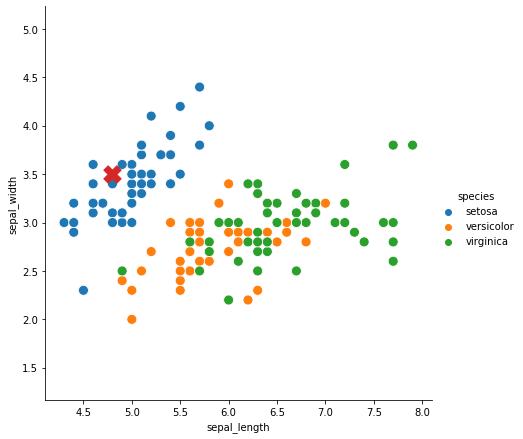

In [19]:
novo_exemplo = pd.DataFrame(data = {'sepal_length' : [4.8], 'sepal_width' : [3.5]})
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=6, s=100)
plt.scatter(x = novo_exemplo['sepal_length'], y = novo_exemplo['sepal_width'], 
            marker='X', color=sns.color_palette()[3], s=300)
plt.axis('equal')
plt.show()

In [20]:
novo_exemplo

,sepal_length,sepal_width
0,4.8,3.5


In [21]:
df

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
145,6.7,3.0,virginica
146,6.3,2.5,virginica
147,6.5,3.0,virginica
148,6.2,3.4,virginica


Definindo a função de cálculo de distância

In [22]:
def euclidean_dist (e1, e2):
    squares = (np.array(e1) - np.array(e2) )**2
    sum_of_squares = np.sum(squares)    
    return np.sqrt(sum_of_squares)

In [23]:
# Teste 1
e1 = np.array([0,0])
e2 = np.array([1,1])
euclidean_dist(e1,e2)

1.4142135623730951

In [24]:
# Teste 2
e1 = np.array([2,2])
e2 = np.array([4,3])
euclidean_dist(e1,e2)

2.23606797749979

In [25]:
# Teste 2
e1 = novo_exemplo
e2 =  df[['sepal_length','sepal_width']].iloc[0]
euclidean_dist(e1,e2)

0.2999999999999998

Calcular a distância entre o novo exemplo e cada um dos exemplos no conjunto de treinamento.

In [26]:
novo_exemplo

,sepal_length,sepal_width
0,4.8,3.5


In [27]:
df1 = df.copy()
df1['euclidean_dist'] = df1[['sepal_length','sepal_width']].apply(
        lambda e : euclidean_dist(e, novo_exemplo), axis = 1)

In [28]:
df1

,sepal_length,sepal_width,species,euclidean_dist
0,5.1,3.5,setosa,0.300000
1,4.9,3.0,setosa,0.509902
2,4.7,3.2,setosa,0.316228
3,4.6,3.1,setosa,0.447214
4,5.0,3.6,setosa,0.223607
...,...,...,...,...
145,6.7,3.0,virginica,1.964688
146,6.3,2.5,virginica,1.802776
147,6.5,3.0,virginica,1.772005
148,6.2,3.4,virginica,1.403567


Calculamos o índice do exemplo mais próximo no conjunto de treinamento e mostramos o conteúdo

In [29]:
idxmin = df1['euclidean_dist'].idxmin()
nearest_neighbor = df1.loc[idxmin,:]
nearest_neighbor

sepal_length         4.8
sepal_width          3.4
species           setosa
euclidean_dist       0.1
Name: 11, dtype: object

(4.108440962934658, 8.091559037065341, 1.868657667791526, 4.5313423322084745)

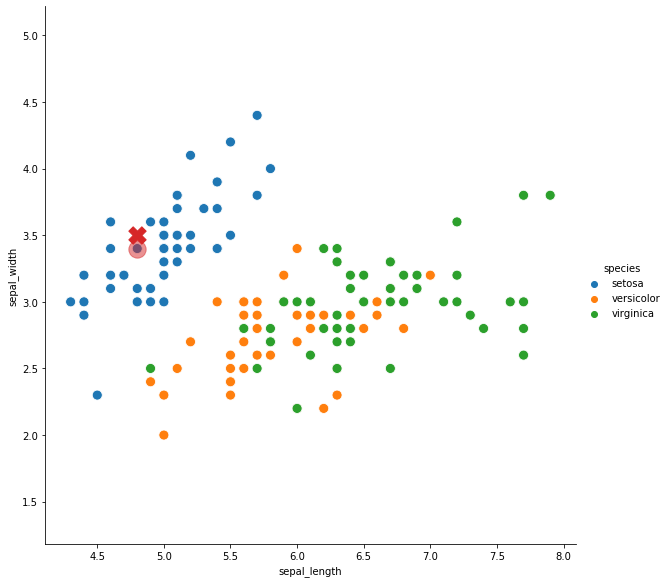

In [30]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=8, s=100)
plt.scatter(x = novo_exemplo['sepal_length'], y = novo_exemplo['sepal_width'], marker='X', color=sns.color_palette()[3], s=300)
plt.scatter(x = nearest_neighbor['sepal_length'], y = nearest_neighbor['sepal_width'], marker='o', color=sns.color_palette()[3], s=300, alpha = 0.5)
plt.axis('equal')

Atribuir ao novo exemplo a classe do exemplo mais próximo

In [31]:
novo_exemplo

,sepal_length,sepal_width
0,4.8,3.5


In [32]:
novo_exemplo['species'] = nearest_neighbor['species']

In [33]:
novo_exemplo

,sepal_length,sepal_width,species
0,4.8,3.5,setosa


## Parâmetros do Algoritmo kNN

## O valor de $k$

- O algoritmo mais comum utiliza $k=1$ e é chamado de 1-Nearest Neighbor ou simplesmente Nearest Neighbor.

- Para este caso o parâmetro da função de predição é obvia, pois será atribuído a um novo exemplo a classe do exemplo mais similar.

- Em geral, esta configuração retorna bons resultados, no entanto pode ter o problema da sensibilidade a ruídos, que podem prejudicar algumas classificações/

- Vamos verificar isso de forma gráfica.

- O espaço de decisão no 1NN é dividido da seguinte forma:

In [48]:
# Função auxiliar para plotar região de decisão
def decision_plot(model, X, y, ax, title): 
    from mlxtend.plotting import plot_decision_regions    
    plot_decision_regions(X.to_numpy(), y, clf=model, legend=1, ax= ax, markers = 'o', zoom_factor = 2, scatter_kwargs = {'s': 100})
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    return ax

In [49]:
# Adicionando as instâncias de treinamento ao algoritmo kNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
target = 'species'
X = df.drop([target], axis=1)
y = df[target].factorize()[0]
model.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

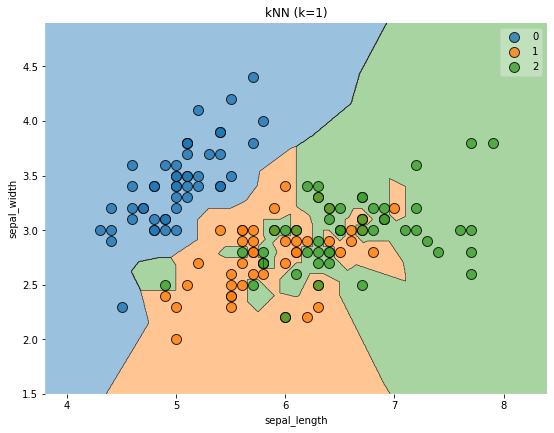

In [51]:
fig, ax = plt.subplots(figsize=(9, 9))
decision_plot(model, X, y, ax, 'kNN (k=1)')
plt.show()

- Para termos uma idéia de como é dividido o espaço de uma árvore de decisão podemos tomar a seguinte árvore para o mesmo problema:

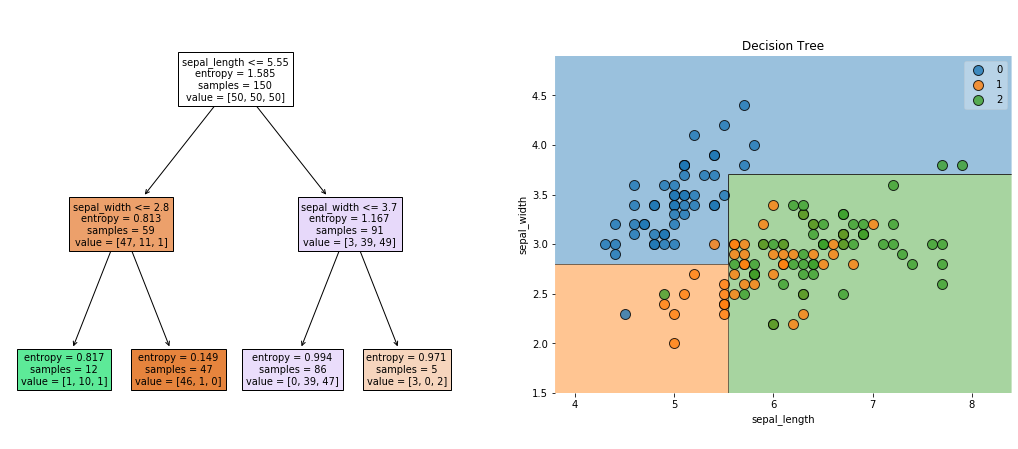

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
model_tree = DecisionTreeClassifier(criterion="entropy", max_depth=2)
model_tree.fit(X,y)

fig, ax = plt.subplots(1,2,figsize=(18, 8))
plot_tree(model_tree, filled=True, feature_names = X.columns, ax=ax[0])
decision_plot(model_tree, X, y, ax[1], 'Decision Tree')
plt.show()

- Comparação entre $k=1$ e $k=2$

In [53]:
model_k1 = KNeighborsClassifier(n_neighbors=1, n_jobs = -1)
model_k2 = KNeighborsClassifier(n_neighbors=2, n_jobs = -1)
model_k1.fit(X,y)
model_k2.fit(X,y)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

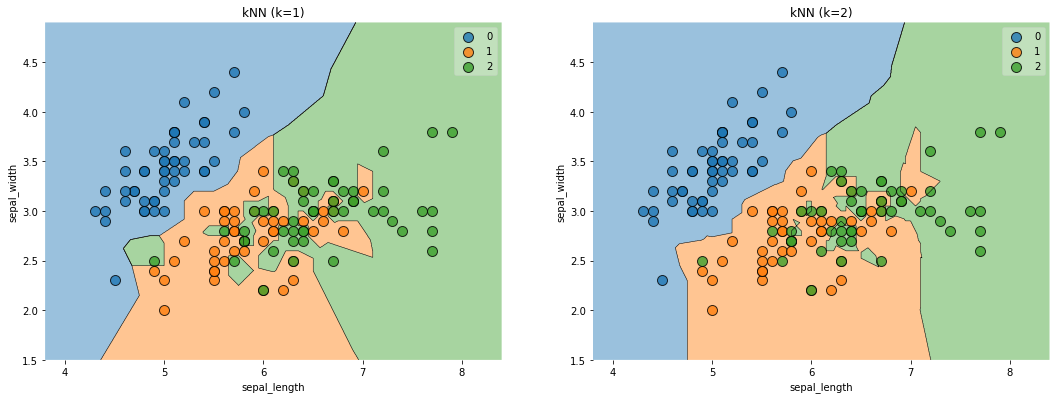

In [54]:
fig, ax = plt.subplots(1,2,figsize=(18, 18))
decision_plot(model_k1, X, y, ax[0], 'kNN (k=1)')
decision_plot(model_k2, X, y, ax[1], 'kNN (k=2)')

- Comparação entre $k=1, 2, 3, 5$

In [33]:
model_k3 = KNeighborsClassifier(n_neighbors=3, n_jobs = -1)
model_k5 = KNeighborsClassifier(n_neighbors=5, n_jobs = -1)
model_k3.fit(X,y)
model_k5.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

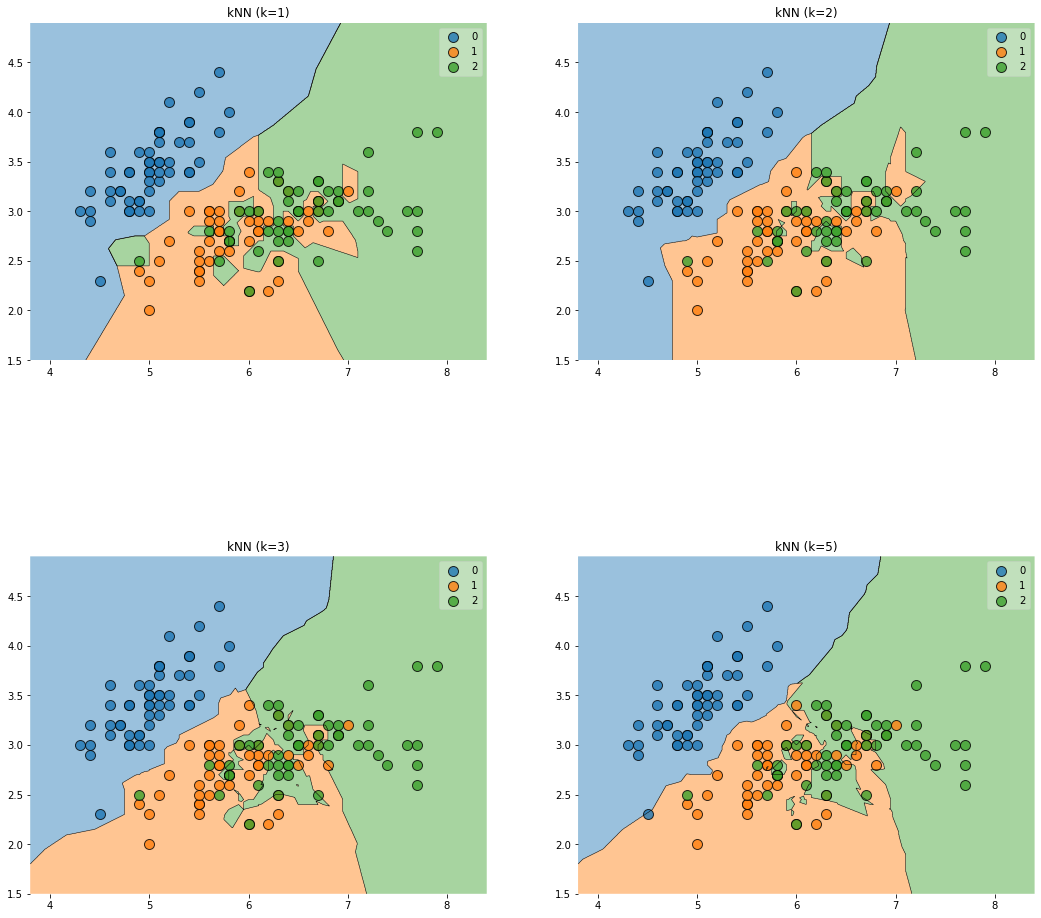

In [34]:
fig, ax = plt.subplots(2,2,figsize=(18, 18))
decision_plot(model_k1, X, y, ax[0,0], 'kNN (k=1)')
decision_plot(model_k2, X, y, ax[0,1], 'kNN (k=2)')
decision_plot(model_k3, X, y, ax[1,0], 'kNN (k=3)')
decision_plot(model_k5, X, y, ax[1,1], 'kNN (k=5)')

- Comparação entre $k=1, 5, 10, 20$

In [35]:
model_k10 = KNeighborsClassifier(n_neighbors=10, n_jobs = -1)
model_k20 = KNeighborsClassifier(n_neighbors=20, n_jobs = -1)
model_k10.fit(X,y)
model_k20.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                     weights='uniform')

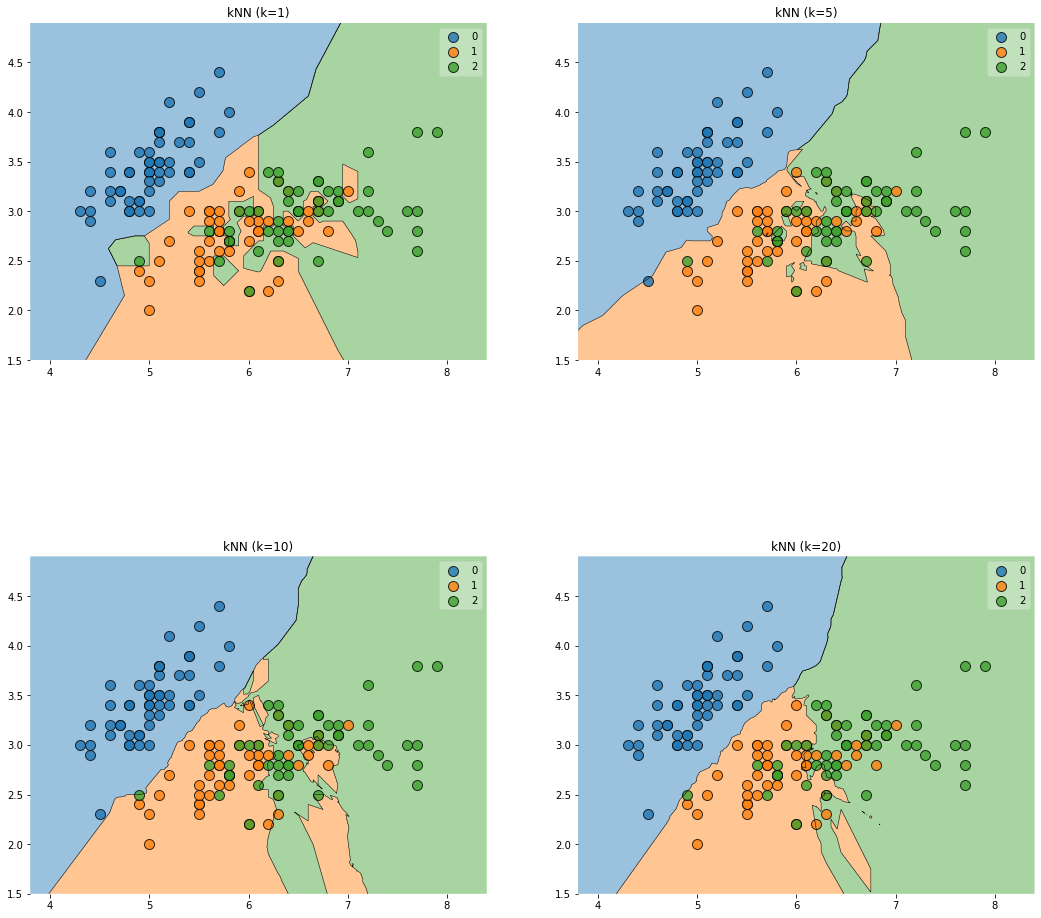

In [36]:
fig, ax = plt.subplots(2,2,figsize=(18, 18))
decision_plot(model_k1, X, y, ax[0,0], 'kNN (k=1)')
decision_plot(model_k5, X, y, ax[0,1], 'kNN (k=5)')
decision_plot(model_k10, X, y, ax[1,0], 'kNN (k=10)')
decision_plot(model_k20, X, y, ax[1,1], 'kNN (k=20)')

- O que observamos então é que à medida que aumentamos o valor de $k$ estamos suavizando o espaço de classificação.

- Esta visualização apresenta a classificação em 2 dimensões, mas o mesmo comportamento é observado para um número maior de dimensões.

- Não há um valor de $k$ que seja ótimo para todos os problemas, então esse valor deve ser ajustado de maneira a maximizar alguma métrica de qualidade, como accuracy, precision ou recall.

## Função de distância

- A função de distância é chave fundamental do processo de classificação com o kNN.

- Embora haja funções de distância de propósito geral, como a Distância Euclidiana, o sucesso da classificação depende de se a função de distância utilizada é apropriada aos dados.

- Quando temos atributos numéricos, como no caso dos conjuntos de dados Iris e Wine (vinhos portugueses), a distância Euclidiana se torna uma boa medida, mas na presença de dados categóricos ou nominais ordinais precisamos tomar alguns cuidados.

### Distância Euclidiana

- A função da Distância Euclidana (também chamada de $L_2$), entre duas instâncias $P$ e $Q$, ambas representadas por $m$ dimensões é:

$$D_{L_2}(P,Q) = \sqrt{\sum_{i=1}^{m} (p_i - q_i)^2} = \Bigg( \sum_{i=1}^{m} (p_i - q_i)^2 \Bigg)^{1/2} $$ 

- Assim, vamos pegar os dois primeiros exemplos para os atributos Septal.Length e Sepal.Width

In [55]:
P = df.iloc[0,0:2]
Q = df.iloc[1,0:2]

In [56]:
P

sepal_length    5.1
sepal_width     3.5
Name: 0, dtype: object

In [57]:
Q

sepal_length    4.9
sepal_width       3
Name: 1, dtype: object

Diferença entre os valores das dimensões, $p_i - q_i$

In [58]:
P-Q

sepal_length    0.2
sepal_width     0.5
dtype: object

Quadrados das diferenças de cada dimensão, onde $(0.2)^2=0.04$ e $(0.5)^2=0.25$

In [59]:
(P-Q)**2

sepal_length    0.04
sepal_width     0.25
dtype: object

Soma dos Quadrados das Diferenças

In [60]:
np.sum((P-Q)**2)

0.2899999999999997

- Aplicação Distância Euclidiana

$$D_{L_2}(P,Q) = \sqrt{\sum_{i=1}^{m} (p_i - q_i)^2} = \sqrt{(5.1-4.9)^2 + (3.5-3.0)^2} = \sqrt{0.29} = 0.54 $$

- O valor da Distância Euclidiana entre esse dois exemplos é 0.54.

- O Problema da Escala das Dimensões:
    - Quando temos duas dimensões com escalas muito diferente podemos ter problemas sérios de distância.
    - Suponha um conjunto de dados com atributos numéricos, como idade e salário, onde valores de idade ficam entre 20 e 80 e valores de salário ficam entre 90 e 500 e, portanto, possuem escalas bem diferentes.

In [61]:
df_e = pd.read_csv('data/employee_data.csv', index_col = 0)
df_e

,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,A,36,5,5,2297
1,1,A,55,3,5,1134
2,2,A,61,8,1,4969
3,3,O,29,3,6,902
4,4,O,34,6,2,3574
...,...,...,...,...,...,...
995,995,O,33,7,7,2996
996,996,O,21,1,2,667
997,997,O,49,9,7,4158
998,998,AB,56,6,7,2414


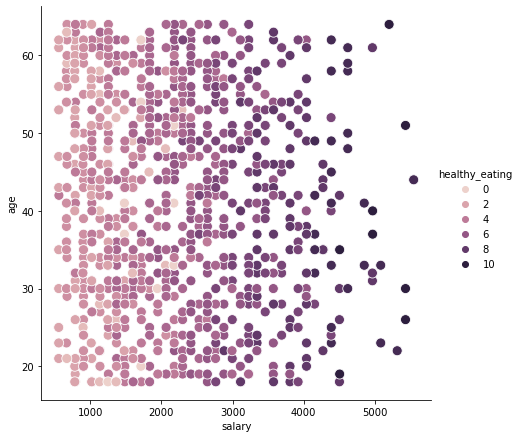

In [64]:
sns.relplot(x='salary', y='age', hue='healthy_eating', data = df_e, height=6, s=100)

In [65]:
df_e5 = df_e.iloc[0:5][['age','salary']]
df_e5

,age,salary
0,36,2297
1,55,1134
2,61,4969
3,29,902
4,34,3574


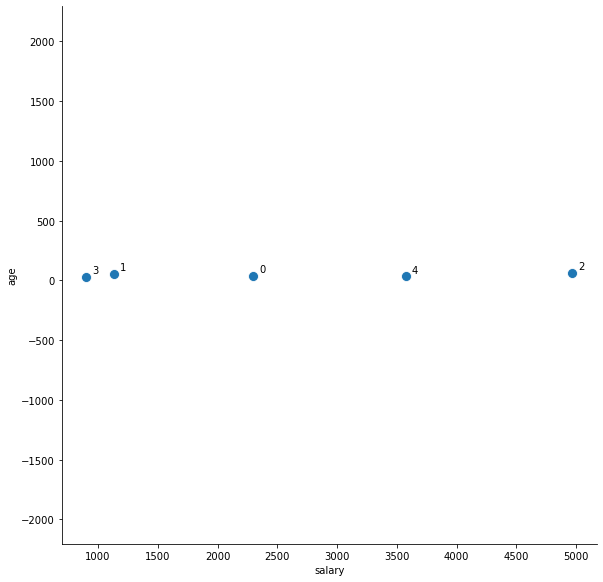

In [66]:
sns.relplot(x='salary', y='age', data = df_e5, height=8, s=100)
plt.axis('equal')
for i in df_e5.index:
    plt.text(df_e5.iloc[i,1]+50, df_e5.iloc[i,0]+30, str(i))

- Matriz de distância entre todos os pares de instâncias
    - Detectamos que os elementos mais próximos são 1 e 3, como visualmente podemos confirmar.

In [67]:
from scipy.spatial import distance_matrix
pd.DataFrame( 
    distance_matrix(df_e5, df_e5), 
    index = df_e5.index,
    columns = df_e5.index ).round(2)

,0,1,2,3,4
0,0.00,1163.16,2672.12,1395.02,1277.00
1,1163.16,0.00,3835.00,233.45,2440.09
2,2672.12,3835.00,0.00,4067.13,1395.26
3,1395.02,233.45,4067.13,0.00,2672.00
4,1277.00,2440.09,1395.26,2672.00,0.00


- Visualização scatter-plot desses dados, normalizando os eixos (o que é feito naturalmente por qualquer função de plot)

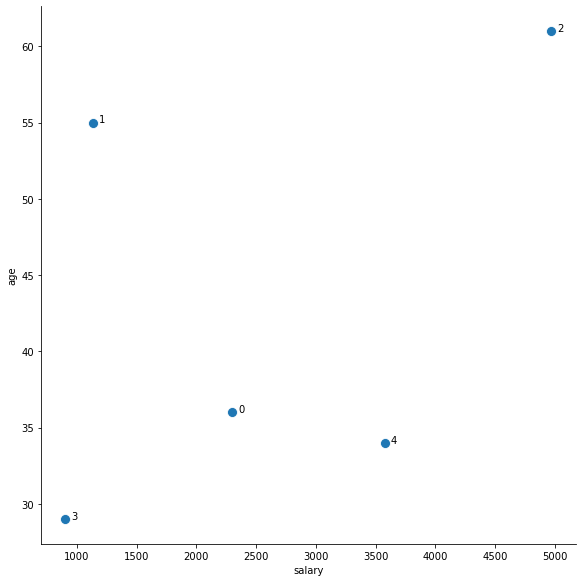

In [68]:
sns.relplot(x='salary', y='age', data = df_e5, height=8, s=100)
for i in df_e5.index:
    plt.text(df_e5.iloc[i,1]+50, df_e5.iloc[i,0], str(i))

- Aqui observamos que ao normalizar as dimensões, os elementos mais próximos não sao mais 2 e 4. O espaço mudou.

In [69]:
def linear_normalization(values):
    return (values - min(values) ) / (max(values) - min(values))

In [70]:
df_e5norm = df_e5.copy()
df_e5norm['age'] = linear_normalization( df_e5['age'] )
df_e5norm['salary'] = linear_normalization( df_e5['salary'] )

- Matriz de distância entre todos os pares de instâncias com seus dados normalizados
    - Detectamos que os elementos mais próximos são 0 e 4, como visualmente podemos confirmar.

In [71]:
pd.DataFrame( 
    distance_matrix(df_e5norm, df_e5norm), 
    index = df_e5.index,
    columns = df_e5.index ).round(2)

,0,1,2,3,4
0,0.00,0.66,1.02,0.41,0.32
1,0.66,0.00,0.96,0.81,0.89
2,1.02,0.96,0.00,1.41,0.91
3,0.41,0.81,1.41,0.00,0.68
4,0.32,0.89,0.91,0.68,0.00


- Como ambas as dimensões estão no intervalo $[0,1]$ podemos acreditar de que o valor da distância $0.32$ entre as instâncias 0 e 4 não possui tendência de uma ou outra dimensão.
- Esta é uma das maiores utilidades de normalizar valores. Neste caso escolhemos a abordagem de transformar para o intervalo $[0,1]$, mas poderíamos usar outra abordagem, como por exemplo standarizar (normalizar por desvio padrão).

### Distância Manhattan

- A distância Manhattan (ou city block ou distância $L_1$) é uma medida de distância que usa a soma do módulo das diferências, como mostra a fórmula

$$D_{L_1}(P,Q) = \sum_{i=1}^{m} |p_i - q_i|$$

- Representação Visual da distância Manhattan:
    - A linha verde representa a distância Euclidiana
    - As outras linhas representam diferentes formas da distância Manhattan, mas que todas possuem a mesma distância.

<figure>
  <img src="img/manhattan.png" alt="Imagem Distância Manhattan" style="width:50%">
  <figcaption>Fonte: https://en.wikipedia.org/wiki/Taxicab_geometry.</figcaption>
</figure>

### Distâncias da Norma $L_p$

- Existem outras fórmulas parecidas para o cáculo de distância, como a distância Minkowski. Mas esta última, junto com a distância Manhattan e a Euclidiana fazem parte de uma família de distâncias, chamadas distâncias da Norma $L_p$.

$$D_{L_p}(P,Q) = \Bigg( \sum_{i=1}^{m} (p_i - q_i)^{p} \Bigg)^{\frac{1}{p}} $$

- Para a distância Manhattan, o valor de $p=1$
- Para a distância Euclidiana, o valor de $p=2$

- Uma comparação entre as medidas Manhattan e Euclidiana
 
<figure>
  <img src="img/lpnorm.png" alt="Imagem Distâncias Norma Lp" style="width:50%">
  <figcaption>Fonte: https://stackoverflow.com/questions/6182005/rough-computation-of-distance-between-2-points.</figcaption>
</figure>
 
- Essa imagem mostra os pontos equidistantes desde o centro até a linha para cada valor de $p$.
- Por exemplo, para $p=2$ é uma circunferência, para $p=1$ é um losango e, para $p=\inf^+$ é um quadrado.

### Similaridade Coseno

$$ \cos ({\bf P},{\bf Q})= {{\bf P} . {\bf Q} \over \|{\bf P}\| \|{\bf Q}\|} = \frac{ \sum_{i=1}^{m}{{\bf p}_i{\bf q}_i} }{ \sqrt{\sum_{i=1}^{m}{({\bf p}_i)^2}} \sqrt{\sum_{i=1}^{,}{({\bf q}_i)^2}} } $$

------
<figure>
  <img src="https://goodboychan.github.io/chans_jupyter/images/copied_from_nb/image/cos_sim.png" style="width:500px">
  <figcaption>Fonte: Kange C. TF-IDF and Similarity Scores. Disponível em: https://goodboychan.github.io/chans_jupyter/python/datacamp/natural_language_processing/2020/07/17/04-TF-IDF-and-similarity-scores.html.</figcaption>
</figure>

## Comparativo de Regiões de Decisão para Diferentes Funções de Distância

In [78]:
model_k3_euclidean = KNeighborsClassifier(n_neighbors=1, metric='euclidean', n_jobs = -1)
model_k3_manhattan = KNeighborsClassifier(n_neighbors=1, metric='manhattan', n_jobs = -1)
model_k3_chebyshev = KNeighborsClassifier(n_neighbors=1, metric='chebyshev', n_jobs = -1)
model_k3_euclidean.fit(X,y)
model_k3_manhattan.fit(X,y)
model_k3_chebyshev.fit(X,y)

KNeighborsClassifier(metric='chebyshev', n_jobs=-1, n_neighbors=1)

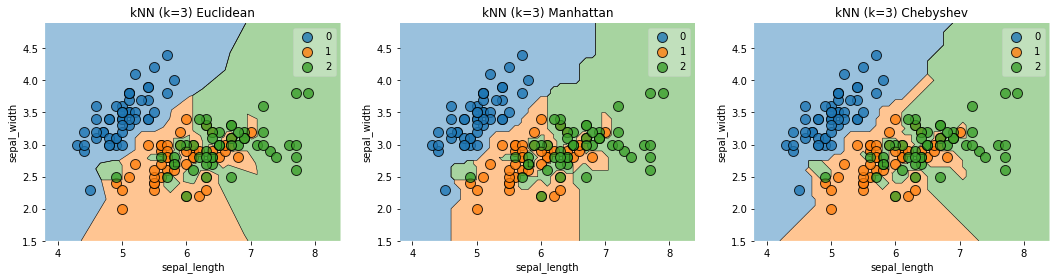

In [79]:
fig, ax = plt.subplots(1,3,figsize=(18, 18))
decision_plot(model_k3_euclidean, X, y, ax[0], 'kNN (k=3) Euclidean')
decision_plot(model_k3_manhattan, X, y, ax[1], 'kNN (k=3) Manhattan')
decision_plot(model_k3_chebyshev, X, y, ax[2], 'kNN (k=3) Chebyshev')
plt.show()

#### Medidas de distância para dados não convencionais

- Existem medidas de distância para vários tipos de objetos ou tipos de dados

- Faça uma pesquisa para encontrar as principais medidas de distância/similaridade entre:
    - Palavras    
    - Imagens
    - Dados Temporais

### Funções de Predição

- A função de predição mais comum é a classe majoritária dentre os $k$ vizinhos mais próximos.

- Mas outras funções são possíveis e podem ser experimentadas para obter melhores resultados de classificação, por exemplo, ponderar os valores das classes dos vizinhos mais próximos pela seu valor de distância, para valorizar mais aqueles que estão mais perto e menos aqueles que estão mais longe. Isso vale apenas para tomar a decisão da classe em relação aos vizinhos mais próximos.

- Uma exemplo de ponderação é usar o inverso da distância. Suponha os $k$ vizinhos mais próximos $E = e_1, e_2, ..., e_k$ de uma instância $x$ com distâncias $D = d_1, d_2, ..., d_k$ e classes $C = c_1, c_2, ..., c_q$. Considere $class(e_i)$ a classe do exemplo $c_i$.

$$
score(c_i, E, D) = \sum_{class(e_i)~=~c_i} {d_i^{-1}}
$$


$$
f(E,D) = \underset{c_i~\in~C}{\operatorname{argmax}} score(c_i, E, D)
$$

- Exemplo com três classes $C = c_1, c_2, c_3$, cinco vizinhos mais próximos de uma instância $E = e_1, e_2, e_3, e_4, e_5$ com classes $c_1, c_2, c_3, c_2, c_1$ e distâncias $d_1=2.0$, $d_2=2.5$, $d_3=3.0$, $d_4=4.0$, $d_5=9.0$.

$$
score(c_1, E, D) = \sum_{class(e_i)~=~c_1} {d_i^{-1}} = 2.0^{-1} + 9.0^{-1} = 0.61\\
score(c_2, E, D) = \sum_{class(e_i)~=~c_2} {d_i^{-1}} = 2.5^{-1} + 4.0^{-1} = 0.65\\
score(c_3, E, D) = \sum_{class(e_i)~=~c_3} {d_i^{-1}} = 3.0^{-1} = 0.33\\
$$

$$
f(E,D) = \underset{c_i~\in~C}{\operatorname{argmax}} score(c_i, E, D) = 
\underset{c_i~\in~C}{\operatorname{argmax}}~(0.61,0.65,0.33) = c_2
$$



## Exercícios

Explore a documentação do `KNeighborsClassifier`. Os parâmetros `n_neighbors`, `weights` e `p` tem relação com os parâmetros `k`, `função de predição` e `função de distância`, comentados nesta aula.

1. Com conjunto de dados iris com 150 instâncias e os atributos `sepal_length` e `sepal_width`, visualize os espaços de decisão de modelos preditivos usando `n_neighbors=3` variando as estratégias `weights` e `p`.

2. Com conjunto de dados iris com 150 instâncias e os atributos `petal_length` e `petal_width`, explore 10 combinações de parâmetros do classificador `KNeighborsClassifier` e visualize os espaços de decisão.

3. Com o conjunto de dados iris com 150 instâncias e todos os atributos, faça a separação de 70% para treino e 30% para teste, de forma estratificada. Usando uma estratégia holdout de avaliação, construa um modelo com o conjunto de treino e calcule os valores de accuracy, precision, recall e Fscore sobre o conjunto de teste. Compare os resultados com os obtidos ao utilizar árvores de decisão (tarefa de avaliação de modelos).